# K-Means

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#BC371B', '#BC881B', '#4FBC1B'])
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from matplotlib import style

In [2]:
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target

In [4]:
print('Dataset: X={}, Y={}'.format(X.shape, Y.shape))

Dataset: X=(150, 4), Y=(150,)


In [5]:
class K_Means_Clustering:
    
    def __init__(self, n_clusters=5, tol=10e-4, max_iter=500):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, X):
        
        n = X.shape[0] 
        m = X.shape[1]
        
        mean = np.mean(X, axis = 0)
        std = np.std(X, axis = 0)
        self.cluster_centers_ = np.random.randn(self.n_clusters, m) * std + mean
        
        self.labels_ = np.zeros(n)
        distances = np.zeros((n, self.n_clusters))
        
        
        self.n_iter_ = 0
        for i in range(self.max_iter):
            self.n_iter_ = i
            
            for j in range(self.n_clusters):
                distances[:,j] = np.sum(((X - self.cluster_centers_[j])**2), axis=1)**(1/2)
                           
            self.labels_ = np.argmin(distances, axis=1)
            
            for j in range(self.n_clusters):
                if j not in self.labels_: 
                    self.labels_[random.randint(0, n-1)] = j
            
                
            prev_cluster_centers = np.copy(self.cluster_centers_)
            
            for j in range(self.n_clusters):
                self.cluster_centers_[j] = np.mean(X[self.labels_ == j], axis=0)
                
            err = 0
            for j in range(self.n_clusters):
                err = err + np.sum(((prev_cluster_centers[j] - self.cluster_centers_[j])**2), axis=0)**(1/2)
                
            if err < self.tol:
                break
        
                
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for j in range(self.n_clusters):
            distances[:,j] = np.sum(((X - self.cluster_centers_[j])**2), axis=1)**(1/2)
        classification = np.argmin(distances, axis=1)
        return classification

In [6]:
#Elbow Method 
wcss = []

In [7]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

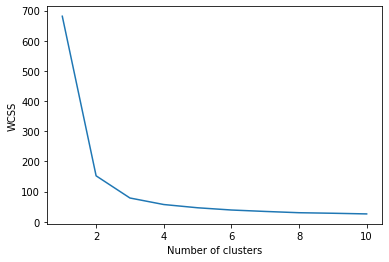

In [8]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
cls = K_Means_Clustering(n_clusters=3)
cls.fit(X)

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
Y_pred = cls.predict(X)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [12]:
centers = cls.cluster_centers_
print(centers)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [13]:
accuracy_score(Y, Y_pred)

0.8933333333333333

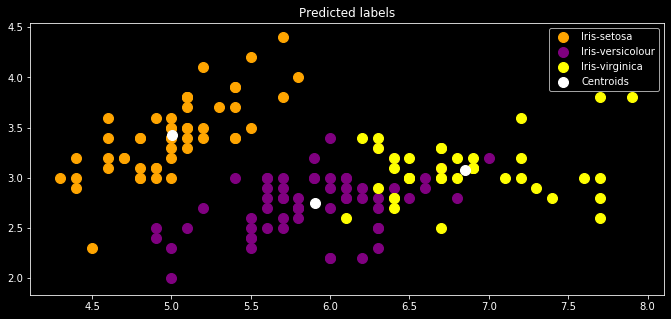

In [14]:
style.use('dark_background')
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:,1], s = 100, c = 'white', label = 'Centroids')
plt.title('Predicted labels')
plt.legend()

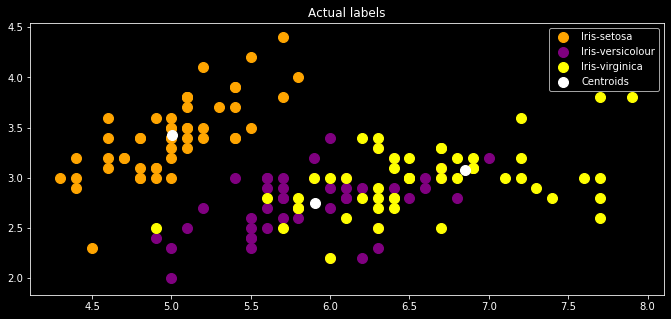

In [15]:
style.use('dark_background')
plt.figure(figsize=(25,5))
plt.subplot(122)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:,1], s = 100, c = 'white', label = 'Centroids')
plt.title('Actual labels')
plt.legend()